In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append('/Users/minghongsun/Desktop/model/')
from my_functions import *
import warnings

import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression




In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Hiragino Sans GB'

In [3]:
industries_lis = ['Ｅ１４パルプ・紙・紙加工品製造業','Ｅ１６化学工業','Ｅ１８プラスチック製品製造業','Ｅ１９ゴム製品製造業','Ｅ２１窯業・土石製品製造業','Ｅ２２鉄鋼業','Ｅ２３非鉄金属製造業','Ｅ２４金属製品製造業']

In [4]:
data_lis = []
for item in industries_lis:
    df_lis = data_read(item)
    data = data_preprosessing(df_lis)
    mul_index = data[data['勤続年数']=='-'].groupby(['学历年龄','year','education','sex']).mean().index
    data = fill_null_data(mul_index,data)
    data_lis.append(data)

****************************************************************************************************
Paragrams for filling null data:
--------------------------------------------------
学历年龄 : ２０～２４歳
Sex:1
Education year:9
Year of filling null data:[2010]
--------------------------------------------------
Fill value is :[ 22.42222222   2.38888889 177.44444444  19.         211.93333333
 183.58888889 279.14444444  16.33333333]
--------------------------------------------------
index location of filling null data:Int64Index([64], dtype='int64')
****************************************************************************************************
Paragrams for filling null data:
--------------------------------------------------
学历年龄 : ２０～２４歳
Sex:0
Education year:9
Year of filling null data:[2011]
--------------------------------------------------
Fill value is :[ 22.22222222   1.86666667 162.11111111  14.88888889 156.2
 140.66666667  95.01111111   5.44444444]
--------------------------------

****************************************************************************************************
Paragrams for filling null data:
--------------------------------------------------
学历年龄 : ２０～２４歳
Sex:0
Education year:9
Year of filling null data:[2009, 2011, 2016]
--------------------------------------------------
Fill value is :[ 22.34285714   1.61428571 171.          17.57142857 178.05714286
 156.3         14.72857143   1.71428571]
--------------------------------------------------
index location of filling null data:Int64Index([32], dtype='int64')
****************************************************************************************************
Paragrams for filling null data:
--------------------------------------------------
学历年龄 : ２０～２４歳
Sex:0
Education year:9
Year of filling null data:[2009, 2011, 2016]
--------------------------------------------------
Fill value is :[ 22.34285714   1.61428571 171.          17.57142857 178.05714286
 156.3         14.72857143   1.71428571]
-

In [5]:
length = len(data_lis)
length

8

In [6]:
data = data_lis[0]

In [7]:

for i in range(1,length):
    data = data+ data_lis[i]


In [8]:
data = data.iloc[:,1:]/length

In [9]:
data = data.astype(np.float64)

In [10]:
data.describe()

,年齢,勤続年数,所定内実労働時間数,超過実労働時間数,きまって支給する現金給与額(千円),所定内給与額(千円),年間賞与その他特別給与額(千円),労働者数(十人),year,education,sex
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.00000,640.000000,640.000000,640.000000
mean,40.064982,12.075191,164.735143,13.678174,292.700886,265.084566,815.828801,298.65373,2013.500000,12.750000,0.500000
std,11.357845,7.183694,2.555578,6.217965,84.297460,81.171728,453.920917,380.67375,2.874528,2.588043,0.500391
min,22.158333,1.125000,155.250000,1.750000,157.583333,137.131944,47.291071,3.62500,2009.000000,9.000000,0.000000
25%,31.107292,6.146875,163.250000,8.875000,225.346875,204.065625,503.059375,59.46875,2011.000000,11.250000,0.000000
50%,39.906250,11.525000,164.750000,12.250000,271.175000,243.837500,724.756250,122.75000,2013.500000,13.000000,0.500000
75%,48.994792,17.331250,166.250000,18.500000,345.440625,310.221875,1047.250000,373.56250,2016.000000,14.500000,1.000000
max,58.225000,29.500000,174.750000,40.250000,535.262500,520.912500,2479.075000,1641.25000,2018.000000,16.000000,1.000000


In [11]:
df = pd.read_excel('/Users/minghongsun/Desktop/model/09-18data/各种工业表.xlsx',sheet_name='重化学工業')

In [12]:
data = pd.merge(left = data,right = df,on = 'year',how = 'outer')

In [13]:
data

,年齢,勤続年数,所定内実労働時間数,超過実労働時間数,きまって支給する現金給与額(千円),所定内給与額(千円),年間賞与その他特別給与額(千円),労働者数(十人),year,education,sex,出荷额,中间投入,資本サービス投入指数
0,22.912500,2.575000,162.750000,16.625000,210.737500,183.800000,273.225000,40.500000,2009.0,9.0,1.0,8983516,5196462,1.031842
1,27.525000,4.950000,166.375000,15.750000,234.737500,206.012500,491.325000,48.625000,2009.0,9.0,1.0,8983516,5196462,1.031842
2,32.637500,7.362500,168.625000,13.500000,255.287500,227.462500,550.887500,64.000000,2009.0,9.0,1.0,8983516,5196462,1.031842
3,37.000000,10.962500,166.875000,12.500000,272.275000,248.812500,604.137500,74.625000,2009.0,9.0,1.0,8983516,5196462,1.031842
4,42.600000,14.650000,164.750000,12.000000,319.150000,289.487500,880.100000,78.375000,2009.0,9.0,1.0,8983516,5196462,1.031842
5,47.525000,16.462500,165.500000,12.250000,312.712500,282.925000,779.125000,69.625000,2009.0,9.0,1.0,8983516,5196462,1.031842
6,52.912500,24.962500,163.000000,10.875000,349.300000,314.900000,1044.500000,155.250000,2009.0,9.0,1.0,8983516,5196462,1.031842
7,57.787500,28.700000,159.500000,9.750000,352.312500,322.425000,1100.375000,319.625000,2009.0,9.0,1.0,8983516,5196462,1.031842
8,22.487500,3.162500,162.000000,13.875000,217.775000,189.762500,552.912500,843.250000,2009.0,12.0,1.0,8983516,5196462,1.031842
9,27.650000,5.825000,161.625000,14.000000,250.087500,219.100000,656.987500,1026.250000,2009.0,12.0,1.0,8983516,5196462,1.031842


In [14]:
len(data.columns)

14

In [15]:
data['ckb'] = data['資本サービス投入指数']

In [16]:
data['総労働時間'] = data['所定内実労働時間数'] + data['超過実労働時間数']

In [17]:
data['労働者給与'] = data['きまって支給する現金給与額(千円)'] *12 +data['年間賞与その他特別給与額(千円)']

In [18]:
data['勤続年数2乘'] = np.square(data['勤続年数'])

In [19]:
data = data.astype(np.float64)

In [20]:
data['実際中间投入'] = np.log(data['中间投入'])

In [21]:
data['自然対数出荷額'] = np.log(data['出荷额'])

In [22]:
data['自然対数労働者給与'] = np.log(data['労働者給与'])

In [23]:
hiseiki_rate = [0.31303063861203395,0.31942392909896605,0.3283230713509598,0.3437330928764653,0.35141424991049053,0.35120738636363635,0.35262237762237764,0.3506024096385542,0.3576851695630167]

In [24]:
year = [2009,2010,2012,2013,2014,2015,2016,2017,2018]


In [25]:
df = pd.DataFrame([year,hiseiki_rate],index = ['year','hiseiki']).T
df

,year,hiseiki
0,2009.0,0.313031
1,2010.0,0.319424
2,2012.0,0.328323
3,2013.0,0.343733
4,2014.0,0.351414
5,2015.0,0.351207
6,2016.0,0.352622
7,2017.0,0.350602
8,2018.0,0.357685


In [26]:
data = pd.merge(data,df,on='year')

In [27]:
male_data = data[data['sex']==1]


In [28]:
male_data.reset_index(drop = 'index',inplace=True)


In [29]:
female_data = data[data['sex'] ==0]

In [30]:
female_data.reset_index(inplace=True,drop = 'index')

In [31]:
round(data.describe(),2).iloc[[1,2]]

,年齢,勤続年数,所定内実労働時間数,超過実労働時間数,きまって支給する現金給与額(千円),所定内給与額(千円),年間賞与その他特別給与額(千円),労働者数(十人),year,education,sex,出荷额,中间投入,資本サービス投入指数,ckb,総労働時間,労働者給与,勤続年数2乘,実際中间投入,自然対数出荷額,自然対数労働者給与,hiseiki
mean,40.07,12.03,164.59,13.82,292.91,265.09,818.15,299.99,2013.78,12.75,0.5,10430336.67,5970005.56,1.00,1.00,178.41,4333.05,196.30,15.60,16.16,8.32,0.34
std,11.36,7.18,2.58,6.26,84.20,81.14,457.04,381.91,2.90,2.59,0.5,675576.10,407900.27,0.02,0.02,7.54,1449.17,198.61,0.07,0.07,0.32,0.02


# 女性モデル

## 生产性model

In [32]:
y = female_data['自然対数出荷額']
feature  = female_data.loc[:,['勤続年数','勤続年数2乘','education','実際中间投入','ckb','総労働時間']]
feature = sm.add_constant(feature)
female_pro_res = sm.OLS(y,feature).fit()
female_pro_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                自然対数出荷額   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     105.5
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           5.42e-69
Time:                        13:59:03   Log-Likelihood:                 542.10
No. Observations:                 288   AIC:                            -1070.
Df Residuals:                     281   BIC:                            -1045.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2248      0.579      9.021      0.000       4.085       6.365
勤続年数           0.0023      0.002      1.378      0.169      -0.001       0.006
勤続年数2乘     -4.619e-05   7.03e-05     -0.657      0.512      -0.000    9.21e-05
education      0.0028      0.001      2.746      0.006       0.001       0.005
実際中间投入         0.6803      0.036     18.787      0.000       0.609       0.752
ckb           -0.1897      0.124     -1.535      0.126      -0.433       0.054
総労働時間          0.0026      0.001      5.043      0.000       0.002       0.004
==============================================================================
Omnibus:                       19.406   Durbin-Watson:                   0.168
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.983
Skew:                           0.667   Prob(JB):                     1.68e-05
Kurtosis:                       2.770   Cond. No.                     6.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## salary model

In [33]:
y2 = female_data['自然対数労働者給与']
feature2 = female_data.loc[:,['勤続年数','勤続年数2乘','education']]
feature2 = sm.add_constant(feature2)
female_salary_res= sm.OLS(y2,feature2).fit()
female_salary_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              自然対数労働者給与   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     528.9
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          6.94e-116
Time:                        13:59:03   Log-Likelihood:                 293.78
No. Observations:                 288   AIC:                            -579.6
Df Residuals:                     284   BIC:                            -564.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0022      0.030    231.434      0.000       6.943       7.062
勤続年数           0.0488      0.004     13.553      0.000       0.042       0.056
勤続年数2乘        -0.0014      0.000     -8.646      0.000      -0.002      -0.001
education      0.0639      0.002     31.850      0.000       0.060       0.068
==============================================================================
Omnibus:                       17.984   Durbin-Watson:                   0.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.937
Skew:                           0.643   Prob(JB):                     4.68e-05
Kurtosis:                       3.080   Cond. No.                     1.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# コブダグラス係数(female)

In [34]:
y_c = female_data['自然対数出荷額']
feature_c = female_data.loc[:,['勤続年数','勤続年数2乘','education','実際中间投入','ckb','総労働時間']]
feature_c = sm.add_constant(feature_c)
c_res= sm.OLS(y_c,feature_c).fit()
c_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                自然対数出荷額   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     105.5
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           5.42e-69
Time:                        13:59:03   Log-Likelihood:                 542.10
No. Observations:                 288   AIC:                            -1070.
Df Residuals:                     281   BIC:                            -1045.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2248      0.579      9.021      0.000       4.085       6.365
勤続年数           0.0023      0.002      1.378      0.169      -0.001       0.006
勤続年数2乘     -4.619e-05   7.03e-05     -0.657      0.512      -0.000    9.21e-05
education      0.0028      0.001      2.746      0.006       0.001       0.005
実際中间投入         0.6803      0.036     18.787      0.000       0.609       0.752
ckb           -0.1897      0.124     -1.535      0.126      -0.433       0.054
総労働時間          0.0026      0.001      5.043      0.000       0.002       0.004
==============================================================================
Omnibus:                       19.406   Durbin-Watson:                   0.168
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.983
Skew:                           0.667   Prob(JB):                     1.68e-05
Kurtosis:                       2.770   Cond. No.                     6.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 男性モデル

In [35]:
y = male_data['自然対数出荷額']

In [36]:
feature  = male_data.loc[:,['勤続年数','勤続年数2乘','education','実際中间投入','ckb','総労働時間']]

In [37]:
feature = sm.add_constant(feature)

In [38]:
male_pro_res = sm.OLS(y,feature).fit()

In [39]:
male_pro_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                自然対数出荷額   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     126.8
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           6.20e-77
Time:                        13:59:03   Log-Likelihood:                 560.95
No. Observations:                 288   AIC:                            -1108.
Df Residuals:                     281   BIC:                            -1082.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6872      0.547     10.393      0.000       4.610       6.764
勤続年数           0.0010      0.001      0.933      0.352      -0.001       0.003
勤続年数2乘      5.726e-05   3.71e-05      1.545      0.124   -1.57e-05       0.000
education      0.0071      0.001      6.058      0.000       0.005       0.009
実際中间投入         0.6026      0.036     16.724      0.000       0.532       0.674
ckb            0.0213      0.120      0.177      0.859      -0.216       0.258
総労働時間          0.0051      0.001      8.289      0.000       0.004       0.006
==============================================================================
Omnibus:                       13.412   Durbin-Watson:                   0.210
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.838
Skew:                           0.506   Prob(JB):                     0.000989
Kurtosis:                       2.642   Cond. No.                     9.93e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
y2 = male_data['自然対数労働者給与']
feature2 = male_data.loc[:,['勤続年数','勤続年数2乘','education']]
feature2 = sm.add_constant(feature2)
male_salary_res= sm.OLS(y2,feature2).fit()

In [41]:
male_salary_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              自然対数労働者給与   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     1586.
Date:                Sun, 16 Jul 2023   Prob (F-statistic):          5.30e-177
Time:                        13:59:03   Log-Likelihood:                 372.84
No. Observations:                 288   AIC:                            -737.7
Df Residuals:                     284   BIC:                            -723.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3235      0.023    317.771      0.000       7.278       7.369
勤続年数           0.0663      0.002     32.678      0.000       0.062       0.070
勤続年数2乘        -0.0013   6.91e-05    -19.127      0.000      -0.001      -0.001
education      0.0487      0.002     32.006      0.000       0.046       0.052
==============================================================================
Omnibus:                       16.453   Durbin-Watson:                   0.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.201
Skew:                           0.616   Prob(JB):                     0.000112
Kurtosis:                       2.964   Cond. No.                     2.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# コブダグラス係数(male)

In [42]:
y_c = male_data['自然対数出荷額']
feature_c = male_data.loc[:,['勤続年数','勤続年数2乘','education','実際中间投入','ckb','総労働時間']]
feature_c = sm.add_constant(feature_c)
c_res= sm.OLS(y_c,feature_c).fit()
c_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                自然対数出荷額   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     126.8
Date:                Sun, 16 Jul 2023   Prob (F-statistic):           6.20e-77
Time:                        13:59:03   Log-Likelihood:                 560.95
No. Observations:                 288   AIC:                            -1108.
Df Residuals:                     281   BIC:                            -1082.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6872      0.547     10.393      0.000       4.610       6.764
勤続年数           0.0010      0.001      0.933      0.352      -0.001       0.003
勤続年数2乘      5.726e-05   3.71e-05      1.545      0.124   -1.57e-05       0.000
education      0.0071      0.001      6.058      0.000       0.005       0.009
実際中间投入         0.6026      0.036     16.724      0.000       0.532       0.674
ckb            0.0213      0.120      0.177      0.859      -0.216       0.258
総労働時間          0.0051      0.001      8.289      0.000       0.004       0.006
==============================================================================
Omnibus:                       13.412   Durbin-Watson:                   0.210
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.838
Skew:                           0.506   Prob(JB):                     0.000989
Kurtosis:                       2.642   Cond. No.                     9.93e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# graph（male）

In [43]:
male_pro_res.params

const        5.687224
勤続年数         0.000993
勤続年数2乘       0.000057
education    0.007072
実際中间投入       0.602617
ckb          0.021338
総労働時間        0.005117
dtype: float64

In [44]:
kinzoku_p = male_pro_res.params[1]
kinzoku_square_p = male_pro_res.params[2]
const_p = male_pro_res.params[0]


In [45]:
male_salary_res.params

const        7.323483
勤続年数         0.066287
勤続年数2乘      -0.001321
education    0.048715
dtype: float64

In [46]:
kinzoku_s = male_salary_res.params[1]
kinzoku_square_s = male_salary_res.params[2]
const_s = male_salary_res.params[0]


In [47]:

f_salary =lambda x: kinzoku_s * x + kinzoku_square_s * (x**2) + const_s
f_pro = lambda x : kinzoku_p * x + kinzoku_square_p * (x**2) +const_p


In [48]:
x_hats = male_data['勤続年数']
x_hats = np.sort(x_hats)

len(x_hats)

288

In [49]:
salary_hats = f_salary(np.array(x_hats))
pro_hats = f_pro(np.array(x_hats))

In [50]:
pro_lis = []
for ind in range(len(pro_hats)):
    res = pro_hats[ind]/pro_hats[0]
    pro_lis.append(res)

In [51]:
sal_lis = []
for ind in range(len(salary_hats)):
    res = salary_hats[ind]/salary_hats[0]
    sal_lis.append(res)
   

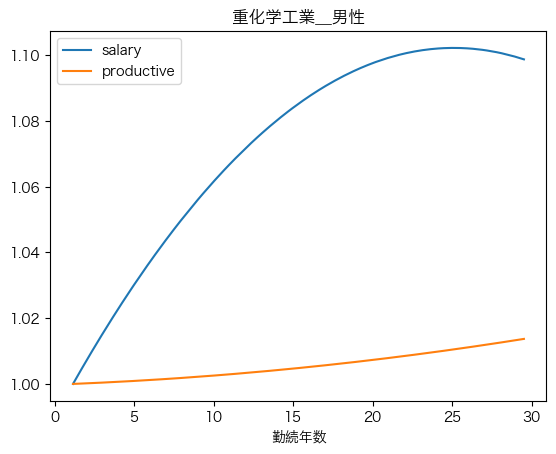

In [52]:
figure = plt.figure()
ax = plt.subplot(111)
plt.plot(x_hats,sal_lis,label = 'salary')
plt.plot(x_hats,pro_lis,label = 'productive') #y(n)/y(0)
plt.title('重化学工業＿男性')
plt.xlabel('勤続年数')

plt.legend()

figure.savefig('重化学工業＿男性.png')

In [53]:
hiseiki_male = male_data['hiseiki']
s_p = salary_hats - pro_hats

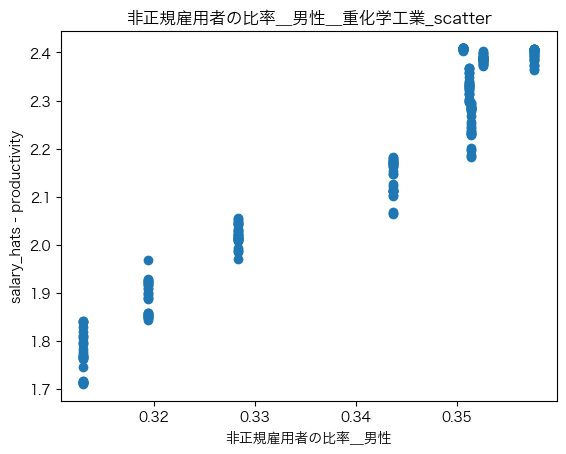

In [54]:
fig = plt.figure()
ax = plt.subplot(111)
plt.scatter(hiseiki_male,s_p)
plt.xlabel('非正規雇用者の比率＿男性')
plt.ylabel('salary_hats - productivity')
plt.title('非正規雇用者の比率＿男性＿重化学工業_scatter')

plt.savefig('非正規雇用者の比率＿男性＿重化学工業_scatter')

# graph(female)

In [55]:
kinzoku_p_f = female_pro_res.params[1]
kinzoku_square_p_f = female_pro_res.params[2]
const_p_f = female_pro_res.params[0]

In [56]:
kinzoku_s_f = female_salary_res.params[1]
kinzoku_square_s_f = female_salary_res.params[2]
const_s_f = female_salary_res.params[0]

In [57]:
f_salary_f =lambda x: kinzoku_s_f * x + kinzoku_square_s_f * (x**2) + const_s_f
f_pro_f = lambda x : kinzoku_p_f * x + kinzoku_square_p_f * (x**2) + const_p_f


In [58]:
x_hats_f = female_data['勤続年数']
x_hats_f = np.sort(x_hats_f)

In [59]:
salary_hats_f = f_salary_f(np.array(x_hats_f))
pro_hats_f = f_pro_f(np.array(x_hats_f))

In [60]:
pro_lis_f = []
for ind in range(len(pro_hats_f)):
    res = pro_hats_f[ind]/pro_hats_f[0]
    pro_lis_f.append(res)
    

In [61]:
sal_lis_f = []
for ind in range(len(salary_hats_f)):
    res = salary_hats_f[ind]/salary_hats_f[0]
    sal_lis_f.append(res)

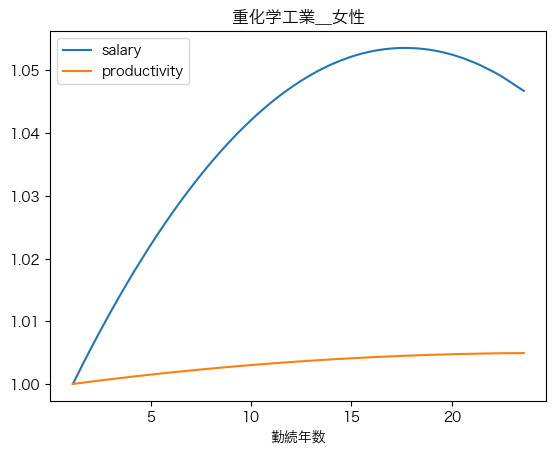

In [62]:
figure = plt.figure()
ax = plt.subplot(111)

plt.plot(x_hats_f,sal_lis_f,label = 'salary')
plt.plot(x_hats_f,pro_lis_f,label = 'productivity') #y(n)/y(0)
plt.title('重化学工業＿女性')
plt.xlabel('勤続年数')
plt.legend()

figure.savefig('重化学工業＿女性.png')

In [63]:
hiseiki_female = female_data['hiseiki']
s_p_f = salary_hats_f - pro_hats_f

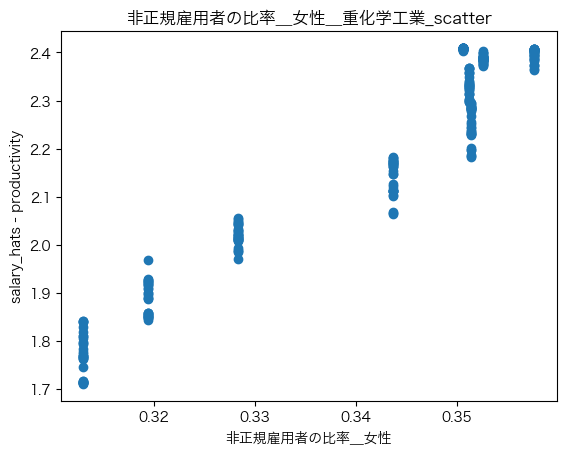

In [64]:
fig = plt.figure()
ax = plt.subplot(111)


plt.scatter(hiseiki_female,s_p)
plt.xlabel('非正規雇用者の比率＿女性')
plt.ylabel('salary_hats - productivity')
plt.title('非正規雇用者の比率＿女性＿重化学工業_scatter')

plt.savefig('非正規雇用者の比率＿女性重化学工業_scatter')

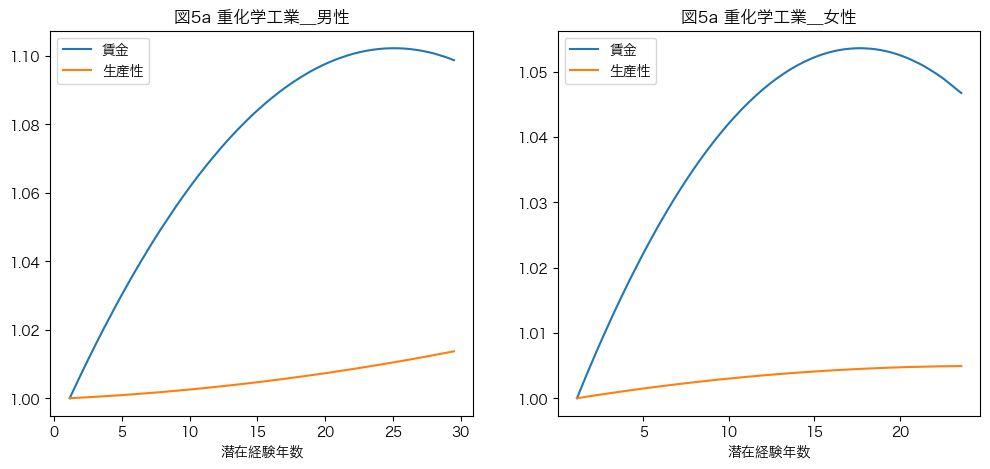

In [65]:
fig = plt.figure(figsize=(12,5))

ax1 = plt.subplot(121)
plt.plot(x_hats,sal_lis,label = '賃金')
plt.plot(x_hats,pro_lis,label = '生産性') #y(n)/y(0)
plt.title('図5a 重化学工業＿男性')
plt.xlabel('潜在経験年数')
plt.legend()

ax2 = plt.subplot(122)
plt.plot(x_hats_f,sal_lis_f,label = '賃金')
plt.plot(x_hats_f,pro_lis_f,label = '生産性') #y(n)/y(0)
plt.title('図5a 重化学工業＿女性')
plt.xlabel('潜在経験年数')
plt.legend()

plt.savefig('重化学工業.png')

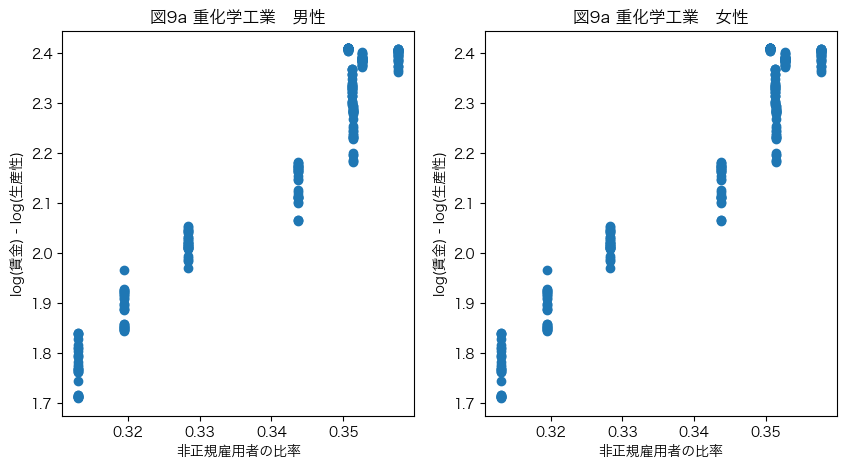

In [67]:
figure = plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
plt.scatter(hiseiki_male,s_p)
plt.xlabel('非正規雇用者の比率')
plt.ylabel('log(賃金) - log(生産性)')
plt.title('図9a 重化学工業　男性')

ax2 = plt.subplot(122)
plt.scatter(hiseiki_female,s_p)
plt.xlabel('非正規雇用者の比率')
plt.ylabel('log(賃金) - log(生産性)')
plt.title('図9a 重化学工業　女性')

plt.savefig('図9')
